In [19]:
import pandas as pd
import numpy as np

import networkx as nx

import matplotlib.pyplot as plt


In [3]:
df_part_build = pd.read_pickle('part_build.plk')

In [229]:
df_part_build['type'].unique()
df_part_build = df_part_build[df_part_build['type'].isin(['CPU','Motherboard','Memory','Storage','Video Card'])]

In [234]:
df_edges = df_part_build[['part_url','build_url']]
df_edges = df_edges.drop_duplicates(['part_url','build_url'])
df_edges = df_edges[df_edges.duplicated('part_url',keep = False)]

In [235]:
df_edges = df_part_build[['part_url','build_url']]
df_edges = df_edges.drop_duplicates(['part_url','build_url'])
df_edges = df_edges[df_edges.duplicated('part_url',keep = False)]

df_edges =  pd.merge(df_edges,
                     df_edges,
                     how='inner',on='build_url').set_index('build_url')
df_edges = df_edges[df_edges['part_url_x'] != df_edges['part_url_y']]
df_edges['count'] = 1
df_edges = df_edges.groupby(['part_url_x','part_url_y']).count().reset_index()
df_edges.sort_values('count',ascending = False)#.loc['/b/nYHBD3']

df_edges = df_edges.loc[pd.DataFrame(np.sort(df_edges[['part_url_x','part_url_y']],1),index=df_edges.index).drop_duplicates(keep='first').index]

In [236]:
# df_edges = df_edges[df_edges['count'] > 10]
df_edges.sort_values('count',ascending = False).head()
# df_edges.index = df_edges.index.rename('id')
# df_edges = df_edges.rename(columns = {'part_url_x':'Source','part_url_y':'Target','count':'Weight'})
# df_edges.to_csv('edge_list.csv')


,part_url_x,part_url_y,count
2422,/product/9nm323,/product/jcYQzy,39
2437,/product/9nm323,/product/mwrYcf,38
6995,/product/QKJtt6,/product/mwrYcf,25
4447,/product/JLdxFT,/product/QKJtt6,20
2445,/product/9nm323,/product/p6RFf7,20


In [240]:
sub_edges = df_edges#[(df_edges['part_url_x'] == '/product/9nm323') | (df_edges['part_url_y'] == '/product/9nm323')]
sub_edges

,part_url_x,part_url_y,count
0,/product/23gzK8,/product/484BD3,1
1,/product/23gzK8,/product/6mm323,1
2,/product/23gzK8,/product/GTCD4D,1
3,/product/23gzK8,/product/NyTPxr,1
4,/product/23gzK8,/product/bddxFT,1
...,...,...,...
15800,/product/zR3H99,/product/zZKcCJ,1
15801,/product/zR3H99,/product/zcH8TW,1
15802,/product/zR3H99,/product/zk7CmG,1
15834,/product/zZKcCJ,/product/zk7CmG,1


In [241]:
sub_edges = [ tuple(edge[:2]) for edge in np.array(df_edges)]

In [242]:
G = nx.Graph()
# G.add_nodes_from(df_part_build.part_url.drop_duplicates())
G.add_edges_from(sub_edges) # add_weighted_edges_from # add_edges_from

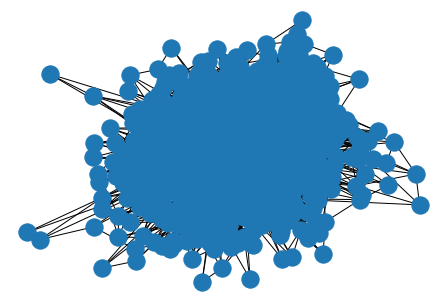

In [243]:
nx.draw(G) # , pos=nx.spectral_layout(G) # , pos = nx.circular_layout(G)

In [70]:
G['/product/NcQypg']

AtlasView({'/product/6hF48d': {'weight': 1}, '/product/BM848d': {'weight': 1}, '/product/PwtQzy': {'weight': 1}, '/product/VhkgXL': {'weight': 1}, '/product/VwbwrH': {'weight': 1}, '/product/bddxFT': {'weight': 1}, '/product/fPFXsY': {'weight': 1}, '/product/fPm323': {'weight': 1}, '/product/hWs8TW': {'weight': 1}, '/product/tkL7YJ': {'weight': 1}, '/product/vbkgXL': {'weight': 1}, '/product/vfDJ7P': {'weight': 1}})

In [208]:
df_gephi = pd.read_csv('Gephi_group.csv')
df_gephi=df_gephi['Id']
df_gephi

0     /product/xttWGX
1     /product/rt98TW
2     /product/6KdxFT
3     /product/2CVBD3
4     /product/9xL7YJ
5     /product/BKKhP6
6     /product/x6648d
7     /product/WkRFf7
8     /product/FqBTwP
9     /product/8hmxFT
10    /product/TgcMnQ
11    /product/p78H99
12    /product/DDp323
13    /product/xjGj4D
14    /product/rtzv6h
15    /product/tbJwrH
16    /product/fqkgXL
17    /product/s2ZFf7
18    /product/tdmxFT
19    /product/Qvzkcf
20    /product/zcH48d
21    /product/DHCD4D
22    /product/Ktzv6h
23    /product/whbp99
24    /product/rsWfrH
Name: Id, dtype: object

In [223]:
df_part_build.set_index('part_url').loc[df_gephi]['build_url'].unique() #.drop_duplicates('part_url',keep='last')

array(['/b/zV7TwP', '/b/6Wb8TW', '/b/4CL2FT', '/b/kDx6Mp', '/b/ZKBZxr',
       '/b/c29G3C', '/b/vJ8MnQ', '/b/Bn7TwP', '/b/mcq323', '/b/hyk6Mp',
       '/b/g7TCmG', '/b/LCb8TW', '/b/VTCLrH', '/b/LZf9TW', '/b/w4n7YJ',
       '/b/6V7TwP', '/b/Wjp8TW', '/b/R7Wbt6', '/b/Kw6RsY', '/b/xKBZxr',
       '/b/ZD27YJ', '/b/zRJbt6', '/b/nvWbt6'], dtype=object)